# Fitting a Gaussian to experimental data, and estimating the uncertainties

To explore this topic we are going to generate some fake data (a Gaussian, with noise added), and see how well we can recover the parameters of the Gaussian.

We are particularly interested in the uncertainty that we can claim for the fitted parameters.

**Important note:** we are dealing with the situation where the data is a Gaussian (or roughly Gaussian) function of an independent variable. We are *not* dealing with repeated measurements of a constant quantity, where the measurements might be distributed in a Gaussian distribution about the mean value.




Prior to adding noise: area =  2.0000, peak = 10.0000, sigma =  1.0000
We found                       2.0029         10.0268           0.9448
With uncertainties of      +/- 0.0674      +/- 0.0359       +/- 0.0381


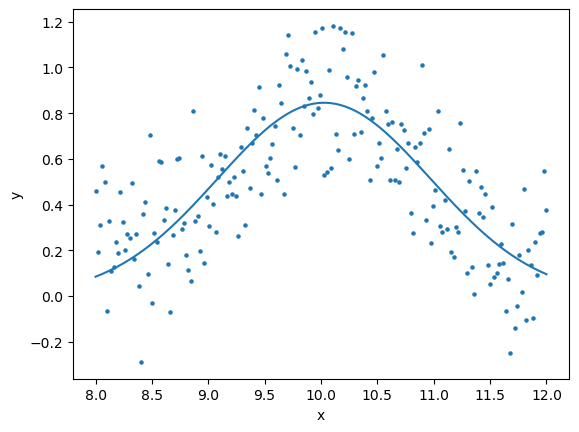




Prior to adding noise: area =  2.0000, peak = 10.0000, sigma =  1.0000
We found                       1.9854          9.9982           0.9936
With uncertainties of      +/- 0.0065      +/- 0.0036       +/- 0.0039


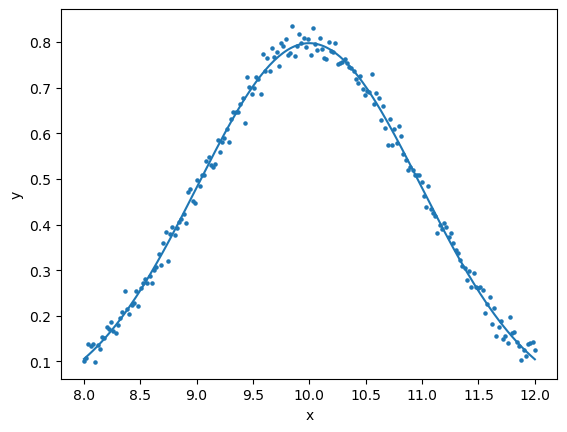




Prior to adding noise: area =  2.0000, peak = 10.0000, sigma =  1.0000
We found                       1.9989          9.9996           0.9995
With uncertainties of      +/- 0.0007      +/- 0.0004       +/- 0.0004


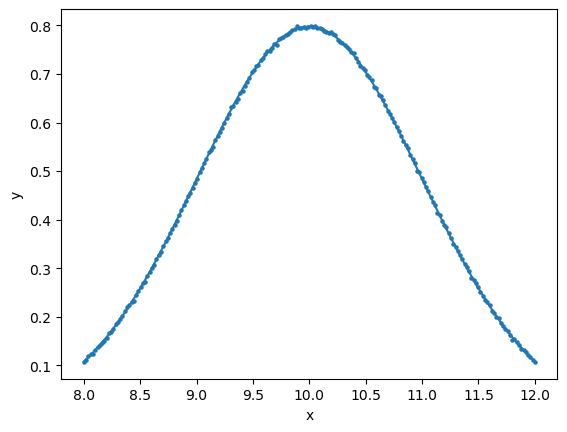

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

# Here are the input parameters for the Gaussian function that
# describes the data.

area = 2.0
mean = 10.0
sigma = 1.0

# Some other user-specified parameters.

number_of_data_points = 200
plotting_range_in_sigma = 2

# Here are the initial guesses for the parameters that we 
# will give to the curve fitting function. We deliberately offset
# a little bit from the known values so that you don't suspect
# we are cheating.

area_guess = area * 1.1
mean_guess = mean * 1.1
sigma_guess = sigma * 1.1

# The following function will return a Gaussian with the specified
# area, mean, and sigma, at each value of x.

def func(x, area, mean, sigma):
    return area * np.exp(-0.5 * ((x - mean)/sigma)**2) / (sigma * (2 * np.pi)**0.5)

# Seed the random number generator, so that we always
# get the same numbers.

np.random.seed(0)

# Generate an array of x values at which to evaluate the Gaussian.

x = np.linspace(mean - plotting_range_in_sigma * sigma, 
                mean + plotting_range_in_sigma * sigma, 
                number_of_data_points)

# Calculate the Gaussian at each x value. This will be the result of
# a perfect measurement, with no noise.

y = func(x, area, mean, sigma)

# Now add some noise, and see how well we can recover the parameters.

for noise in (0.1, 0.01, 0.001):

    # By adding noise we simulate measurements.
    
    y_with_noise = y + np.random.normal(loc = 0.0, 
                                        scale = area * noise, 
                                        size = x.size)

    # Fitting the function to the "measurements" is now as 
    # simple as calling optimize.curve_fit.
    
    pars, pars_covariance = optimize.curve_fit(func, 
                                               x, y_with_noise,
                                               [area_guess, mean_guess, sigma_guess])

    # And the standard deviations of the parameters are:

    oneSigma = np.sqrt(np.diag(pars_covariance))
    
    # Print the expected values for the parameters.
    
    print("\n\n\nPrior to adding noise: area = {:7.4f}, peak = {:7.4f}, sigma = {:7.4f}".format(area, mean, sigma))
    
    # Print the parameters found for the fit, and their standard deviations.
    
    print("We found                      {:7.4f}         {:7.4f}          {:7.4f}".format(pars[0], pars[1], pars[2]))
    print("With uncertainties of      +/-{:7.4f}      +/-{:7.4f}       +/-{:7.4f}".format(oneSigma[0], oneSigma[1], oneSigma[2]))

    # Plot the measurements, and the fit.
    
    plt.scatter(x, y_with_noise, s = 5)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x, func(x, pars[0], pars[1], pars[2]))
    plt.show()

# Some observations

1. The uncertainty in the peak position is **most definitely not** the FWHM of the curve.
2. The peak position can be estimated surprisingly accurately, even with very noisy data.
3. The true values of the area, peak, and sigma of the Gaussian are not always within the uncertainty of the fitted values.
4. The uncertainties go down roughly by a factor of ten for each reduction in noise by a factor of ten.

# The following cell shows how to fit a Gaussian to experimental data

Don't forget to round the uncertainties to one or two digits before quoting them in a laboratory report.

The offset = 0.11 +/- 0.08, the area = 4.96 +/- 2.68, the peak is at x = 9.71 +/- 0.15, with sigma = 7.91 +/- 1.81


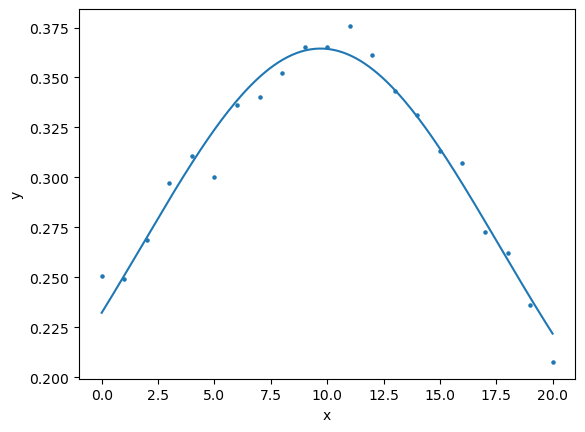

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

# Here are our measurements, to which we want to fit a Gaussian.

data = np.array([
    [ 0, 0.2509],
    [ 1, 0.2492],
    [ 2, 0.2688],
    [ 3, 0.2974],
    [ 4, 0.3106], 
    [ 5, 0.3003],
    [ 6, 0.3364],
    [ 7, 0.3404],
    [ 8, 0.3523],
    [ 9, 0.3655],
    [10, 0.3652],
    [11, 0.3758],
    [12, 0.3612],
    [13, 0.3432],
    [14, 0.3313],
    [15, 0.3133],
    [16, 0.3072],
    [17, 0.2729],
    [18, 0.2621],
    [19, 0.2364],
    [20, 0.2077]
])

# For convenience, call the first column x, and the second column y.

x = data[:, 0]
y = data[:, 1]

# The following function will return a Gaussian with the specified
# offset, area, mean, and sigma, at each value of x.

def func(x, offset, area, mean, sigma):
    return offset + area * np.exp(-0.5 * ((x - mean)/sigma)**2) / (sigma * (2 * np.pi)**0.5)

# Fit a Gaussian to the data, with initial guesses of the parameters
# as shown.

pars, pars_covariance = optimize.curve_fit(func, x, y, [0.1, 2, 12.0, 5.0])

# The standard deviations of the fitted parameters are:

oneSigma = np.sqrt(np.diag(pars_covariance))
    
# Print the parameters found for the fit, and their standard deviations.

print("The offset = {:.2f} +/- {:.2f}, the area = {:.2f} +/- {:.2f}, the peak is at x = {:.2f} +/- {:.2f}, with sigma = {:.2f} +/- {:.2f}".format(pars[0], oneSigma[0], pars[1], oneSigma[1], pars[2], oneSigma[2], pars[3], oneSigma[3]))

# Plot the measurements, and the fit.
    
plt.scatter(x, y, s = 5)
plt.xlabel("x")
plt.ylabel("y")

x_fine = np.linspace(min(x), max(x), 200) 

plt.plot(x_fine, func(x_fine, pars[0], pars[1], pars[2], pars[3]))
plt.show()

Michael Ashley 29 Feb 2024